# Garment Workers' Productivity

The garment industry is one of the key examples of the industrial globalization of the modern era.
It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.

* **Importance**: it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.
* **Dataset**: you can download the dataset [here](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees)

## Dataset exploration

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading in the dataset
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


**features' description(using dataset [manual](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees) :**

`date`: date in MM-DD-YYYY

`quarter`: a portion of the month — month was divided into four quarters

`department`: associated department with the instance

`day`: day of the week

`team`: associated team number with the instance

`targeted_productivity`: targeted productivity set by the authority for each team for each day

`smv`: standard minute value — the allocated time for a task

`wip`: work in progress — includes the number of unfinished items for products

`over_time`: represents the amount of overtime by each team in minutes

`incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action

`idle_time`: the duration of time when the production was interrupted due to several reasons

`idle_men`: the number of workers who were idle due to production interruption

`no_of_style_change`: number of changes in the style of a particular product

`no_of_workers`: number of workers on each team

`actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In [3]:
#finding the sahpe of dataset
df.shape

(1197, 15)

In [4]:
#finding the stats of each column
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
# fiding each column's data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

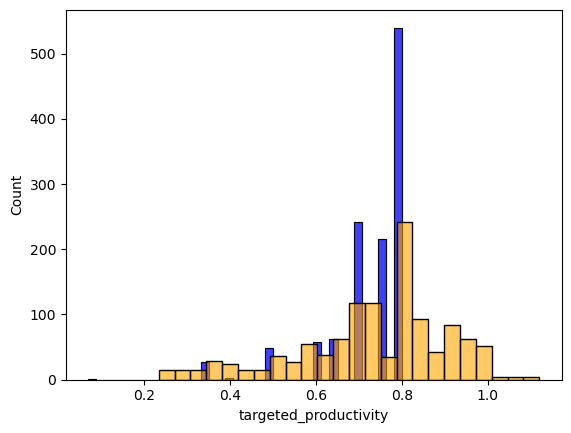

In [6]:
#plotting the distirbution of target productivity vs. actual productivity
sns.histplot(df['targeted_productivity'], color = 'blue')
sns.histplot(df['actual_productivity'], color = 'orange', alpha = 0.6)
plt.show()

the actual productivity shows a wider range, while more symmetric distribution in comparison to the targeted productivity

## Data cleaning (I)

In [7]:
#examining the department column:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

We have two different values for the "finishing" department. It seems one of them has an extra space character. To address this issue, we should remove any spaces:

In [8]:
df['department'] = df['department'].str.replace('\s','')
df['department'].value_counts()

/var/folders/0v/1j5sm8jj7b9fxt050fqlkyhm0000gp/T/ipykernel_11365/3283647196.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['department'] = df['department'].str.replace('\s','')


sweing       691
finishing    506
Name: department, dtype: int64

In [9]:
#examining the wip column
df['wip'].value_counts(dropna = False)

NaN       506
1039.0      5
1282.0      4
1422.0      3
1216.0      3
         ... 
1635.0      1
1519.0      1
1337.0      1
1118.0      1
914.0       1
Name: wip, Length: 549, dtype: int64

We delete the "wip" column. It has too many empty observations, and we can't tell if an empty cell is equal to zero unfinished products or if it's simply missing information. Due to this uncertainty, the column should be removed.



In [10]:
df = df.drop(columns = ['wip'] )
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [11]:
#examining the quarter column
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

We have an outlier value for quarter, Quarter 5. 

In [12]:
#examining the quarter5 value of the quarter column
df.loc[df['quarter'] == 'Quarter5', ['date','quarter']]

,date,quarter
498,1/29/2015,Quarter5
499,1/29/2015,Quarter5
500,1/29/2015,Quarter5
501,1/29/2015,Quarter5
502,1/29/2015,Quarter5
503,1/29/2015,Quarter5
504,1/29/2015,Quarter5
505,1/29/2015,Quarter5
506,1/29/2015,Quarter5
507,1/29/2015,Quarter5


All the values for Quarter5 are in fact in quarter1, so we transform it to Q1 and make this column prepared for usage in our model:

In [13]:
# changing q5 to q1
df.loc[df['quarter'] == 'Quarter5', 'quarter'] = 'Quarter1'
df['quarter'].value_counts()

Quarter1    404
Quarter2    335
Quarter4    248
Quarter3    210
Name: quarter, dtype: int64

In [14]:
#changing quarter column into a numeric column:
df['quarter'] = df['quarter'].replace({'Quarter1' : 1, 'Quarter2' : 2, 'Quarter4' : 4, 'Quarter3' : 3})
df['quarter'].value_counts()

1    404
2    335
4    248
3    210
Name: quarter, dtype: int64

Choosing between date and qaurter columns:
- both columns show some data about the date of each row. we can't use both of them since they are redundent. The less granularity of quarter column and the seasonal nature of garment industry makes this column a better candidate to use for our future predictions.So, we drop the date column: 

In [15]:
#dropping the date column:
df = df.drop(columns = ['date'])
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


It seems that idle_time, idle_men and no_of_style_change are mostly made up of 0 values.so, we investiage them more:

In [16]:
#finding the unique values for 'idle_men','idle_time' and 'no_of_style_change' columns
print(df['idle_men'].value_counts(normalize = True)*100)
print(df['idle_time'].value_counts(normalize = True)*100)
print(df['no_of_style_change'].value_counts(normalize = True)*100)


0     98.496241
10     0.250627
15     0.250627
30     0.250627
20     0.250627
35     0.167084
45     0.083542
37     0.083542
25     0.083542
40     0.083542
Name: idle_men, dtype: float64
0.0      98.496241
3.5       0.250627
2.0       0.167084
5.0       0.167084
8.0       0.167084
4.5       0.167084
4.0       0.167084
90.0      0.083542
150.0     0.083542
270.0     0.083542
300.0     0.083542
6.5       0.083542
Name: idle_time, dtype: float64
0    87.719298
1     9.523810
2     2.756892
Name: no_of_style_change, dtype: float64


about 98% of values in idle_men and idle_time are zero. in addition, around 87% of values in no_of_style_change column is zero. as a result, they rarely show any changes in the target column and we can drop them:

In [17]:
df = df.drop(columns = ['idle_men','idle_time','no_of_style_change'])
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
2,1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570
3,1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570
4,1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382


actual productivity shows values up to 6 decimal points, which seems a bit unnecessary.

In [18]:
# changing actual productivity into two decimal points
df['actual_productivity'] = df['actual_productivity'].round(2)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.89
2,1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.80
3,1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.80
4,1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.80


We are going to build a classification model. so, we can create a label column by comparing actual and targeted prudctivity columns:

In [19]:
#creating a boolean column, productive, by compraing the current productivity columns
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df.sample(10)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
324,3,finishing,Monday,12,0.80,2.90,1440,0,8.0,0.79,False
1071,1,finishing,Thursday,12,0.80,4.60,1080,0,9.0,0.87,True
233,2,finishing,Tuesday,11,0.80,4.15,1440,0,8.0,0.60,False
346,3,sweing,Tuesday,11,0.70,14.89,10260,50,57.0,0.70,True
403,4,sweing,Saturday,10,0.75,22.52,10080,69,56.0,0.80,True
918,4,finishing,Tuesday,11,0.70,2.90,960,0,8.0,0.50,False
1103,1,finishing,Saturday,2,0.65,3.90,1920,0,8.0,0.53,False
1096,1,sweing,Saturday,9,0.75,18.79,3480,45,51.0,0.75,True
611,1,sweing,Wednesday,7,0.70,24.26,6960,0,58.0,0.70,True
235,2,sweing,Tuesday,5,0.70,20.79,10440,0,58.0,0.53,False


## Data cleaning(II)

in this stage, we prepare the dataset to feed into the classifier

In [20]:
#examining the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   int64  
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  productive             1197 non-null   bool   
dtypes: bool(1), float64(4), int64(4), object(2)
memory usage: 94.8+ KB


required changes:
1. we should turn the quarter column to a dummy variable, since the model might think quarter 4 is greater than quarter 1, while it's only a categorical column.
2. we can transform the department column into 0-1 values since it has only two values.
3. the team column should be converted to a duumy variable, since its numbers don't show any rank over each other.
4. day should be converted into a dummy variable.

In [21]:
#changing the quarter column into a dummy variable
df = pd.get_dummies(data = df, columns = ['quarter'], prefix = 'q')
df.sample(10)

,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4
357,sweing,Wednesday,8,0.80,25.90,7470,38,56.5,0.80,True,0,0,1,0
1139,finishing,Monday,1,0.75,3.94,0,960,8.0,0.79,True,0,1,0,0
79,sweing,Monday,3,0.75,19.87,6600,45,55.0,0.75,True,1,0,0,0
44,finishing,Sunday,4,0.80,3.94,6600,0,20.0,0.86,True,1,0,0,0
439,finishing,Monday,4,0.75,4.30,2160,0,12.0,0.96,True,0,0,0,1
2,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.80,True,1,0,0,0
1020,sweing,Monday,10,0.70,21.82,3600,30,51.0,0.70,True,1,0,0,0
1089,sweing,Saturday,1,0.70,26.82,8160,70,58.0,0.85,True,1,0,0,0
742,finishing,Thursday,5,0.70,4.15,240,0,2.0,0.58,False,0,1,0,0
609,finishing,Wednesday,9,0.75,3.94,960,0,8.0,0.76,True,1,0,0,0


In [22]:
#changing the day and team columns into dummy variables
df = pd.get_dummies(data = df, columns = ['day', 'team'], prefix = [None,'team'])
df.sample(10)

,department,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
374,sweing,0.70,22.94,10620,60,57.0,0.80,True,0,0,...,0,0,0,0,0,0,0,0,0,0
1185,sweing,0.75,16.10,5400,45,45.0,0.75,True,0,1,...,0,0,0,0,0,0,0,0,0,0
486,sweing,0.80,22.52,6780,50,56.5,0.80,True,0,0,...,0,1,0,0,0,0,0,0,0,0
1147,sweing,0.50,30.48,6600,0,55.0,0.50,True,0,1,...,0,0,0,0,1,0,0,0,0,0
692,finishing,0.80,4.08,1080,0,9.0,1.00,True,0,1,...,0,0,0,0,0,0,0,0,0,1
912,sweing,0.75,29.40,5340,45,60.0,0.75,True,0,0,...,1,0,0,0,0,0,0,0,0,0
771,finishing,0.75,4.15,240,0,2.0,0.76,True,0,0,...,0,0,1,0,0,0,0,0,0,0
249,sweing,0.80,11.61,5670,38,31.5,0.80,True,0,1,...,0,0,0,1,0,0,0,0,0,0
931,sweing,0.75,11.61,3360,45,57.0,0.75,True,0,0,...,0,0,0,0,0,0,0,0,1,0
574,finishing,0.65,4.15,960,0,8.0,0.56,False,1,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
#changing the department column into 0-1 values
df['department'] = df['department'].replace({'finishing' : 0, 'sweing' : 1})
df = df.rename(columns = {'department': 'sweing_dept'})
df.head(10)

,sweing_dept,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59.0,0.94,True,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.75,3.94,960,0,8.0,0.89,True,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.80,11.41,3660,50,30.5,0.80,True,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0.80,11.41,3660,50,30.5,0.80,True,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0.80,25.90,1920,50,56.0,0.80,True,1,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0.80,25.90,6720,38,56.0,0.80,True,1,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0.75,3.94,960,0,8.0,0.76,True,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0.75,28.08,6900,45,57.5,0.75,True,1,0,...,1,0,0,0,0,0,0,0,0,0
8,1,0.75,19.87,6000,34,55.0,0.75,True,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0.75,28.08,6900,45,57.5,0.75,True,1,0,...,0,0,0,0,0,0,0,0,0,0


##  Building the tree

at this stage, we start to build a decision tree.

In [24]:
#importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [25]:
#building featrues, target, train and test sets
X = df.drop(columns = ['productive','actual_productivity'])
y = df['productive']

#I dropped "actual_productivity" as well, since it is a target column for a regression tree
# and shows real target values

#to make sure case and non case values will be distributed evenly along sets, use stratify
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, stratify = y)


In [26]:
#instantiating and fitting a decision tree classifier
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 12)
dtc.fit(X_train, y_train)

#predicting y_pred(y_test)
y_pred = dtc.predict(X_test)

#finding the accuracy score of model
score1 = dtc.score(X_test,y_test)
print(f"initial model's performance is {score1:.2f}")

initial model's performance is 0.84


## Visualizing the tree

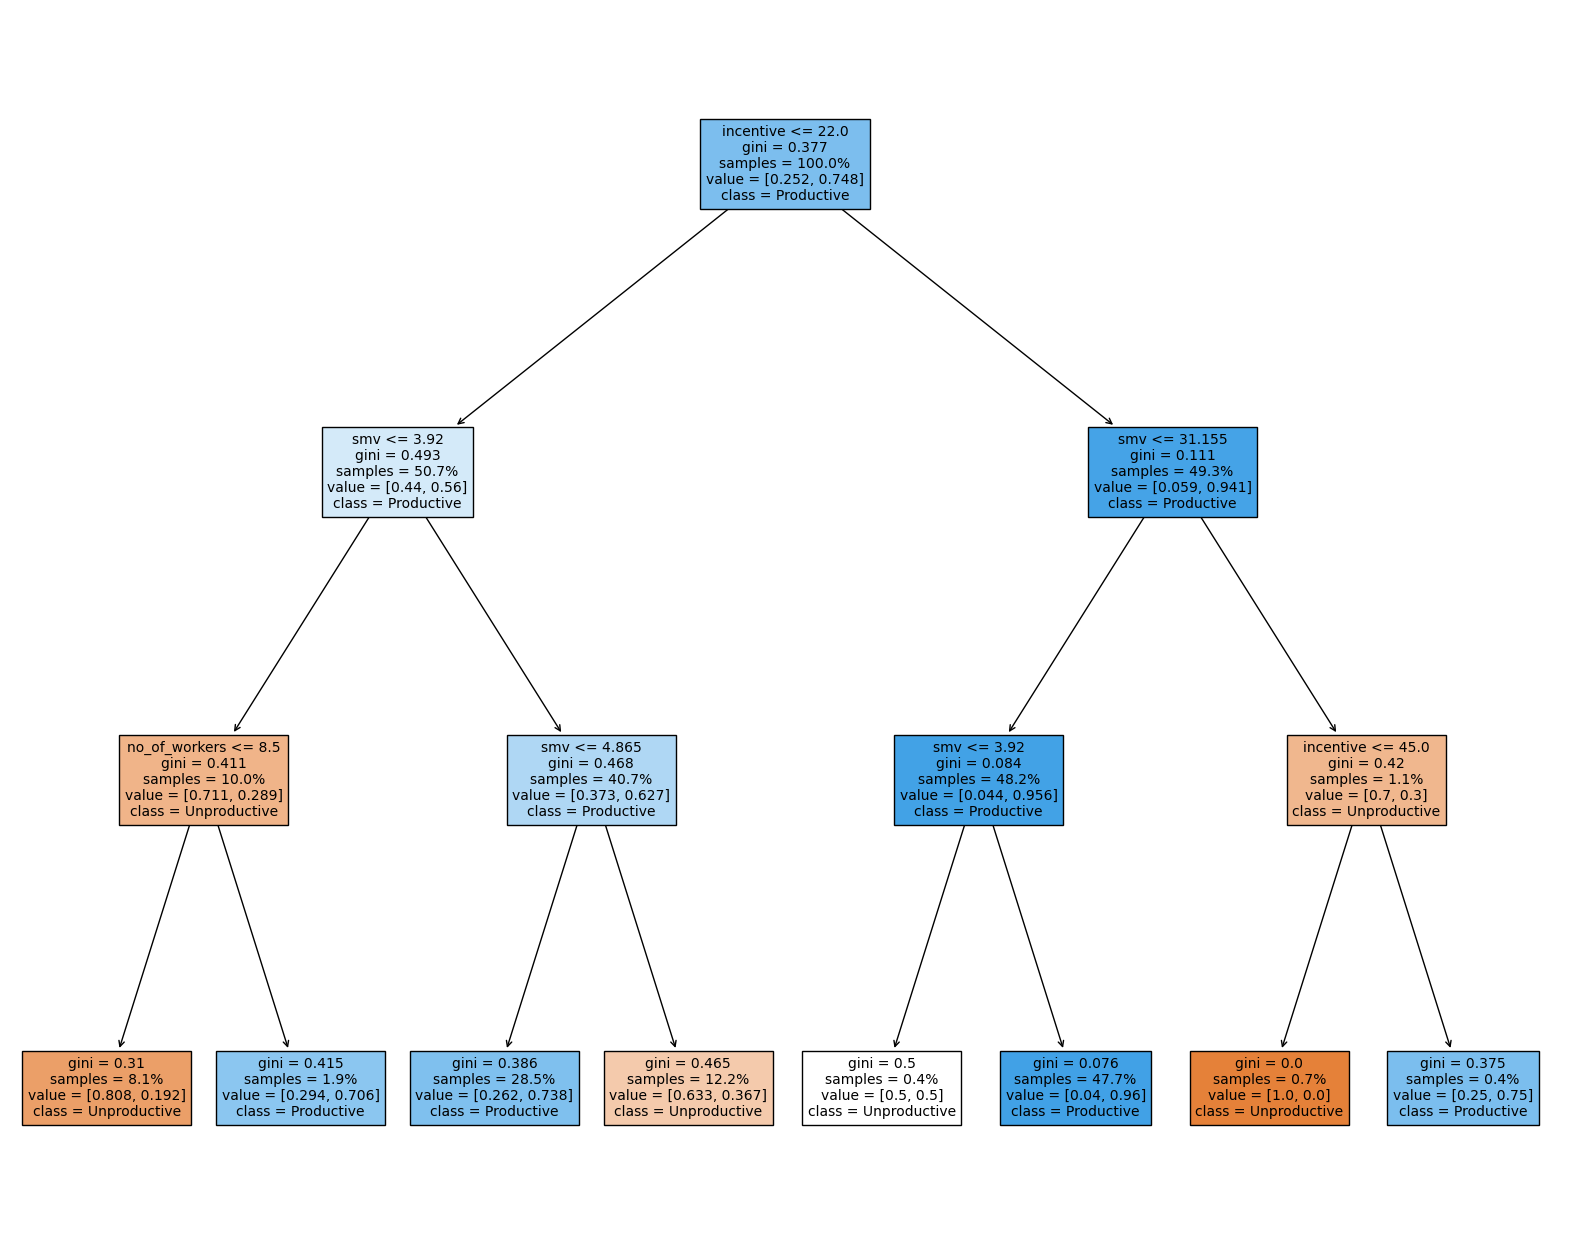

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,16))
_ = plot_tree(dtc, feature_names = X.columns, filled = True, 
              class_names = ["Unproductive", "Productive"],fontsize = 10, proportion = True)
plt.show()

### Describing the Tree:
We can see here that the most significant columns turned out to be "incentive" and "smv" (Standard Minute Value, or the allocated time for a task). All the splits, except one, used these columns to progressively divide the dataset into more homogeneous subsets.

It's important to remember that we pruned the tree when we instantiated the model. We restricted it to only feature a maximum depth of three levels to avoiding overfitting. If we hadn't, it's likely we would've seen other columns further dividing the dataset.

Let's use the model on a hypothetical observation which has an "incentive" of 24 and a "smv" of 5. You don't actually need any code to do this, as you can use the tree visually by following the branches to reach the leaf containing the prediction.

Since the "incentive" is greater than 22, 24 <= 22 evaluates to False at the root node and so we follow the path to the right (False splits always go to the right.) Since the "smv" is less than 31.155, 5 <= 31.155 evaluates to True at the child node below the root and so we follow the path to the left (True splits always go to the left.) In the final split before the leaf, since the "smv" is greater than 3.92, 5 <= 3.92 evaluates to False and so we follow the path to the right where we reach the final leaf node, which happens to feature a "Productive" class.

To summarize, all this means that an observation with those characteristics would be predicted as "Productive" by the Decision Tree.

Feel free to use any observation you want by choosing alternate "incentive" and "smv" values to see where the Tree leads you!

### Evaluating performance metrics:

At this stage, we find out the performance of the tree using various performance metrics:

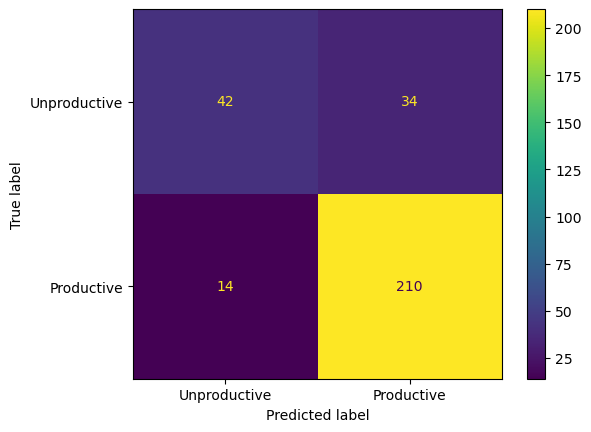

In [28]:
# using confustion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmx = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cmx, 
                                  display_labels = ["Unproductive", "Productive"])
display.plot()
plt.show()

- True positive = 205

- True Negative = 38

- False Positive = 38

- False Negative = 19

In [29]:
#using classifictaion report 
from sklearn.metrics import classification_report
data = classification_report(y_test, y_pred)
print(data)

              precision    recall  f1-score   support

       False       0.75      0.55      0.64        76
        True       0.86      0.94      0.90       224

    accuracy                           0.84       300
   macro avg       0.81      0.75      0.77       300
weighted avg       0.83      0.84      0.83       300



Model tends to predict more accurately, with higher performance metrics, the case(productive) labels. The precision for cas(productive) labels is 84%, while this metric for non-case(non-productive) labels is 67%. 

- Accuracy: 81%
- Recall: 92%
- Precision: 84%
- F1 score: 88%



**Using cross validation technique:**

since the tree models are highly sensitive to each individual value in a feature, we might see different threshols for different train and test sets, which affect model's performance metrics. 
To address this issue, we use the **cross validation** technique to test k folds(splits, chunks) of our main dataset as train and test sets each time and use the average score of metrics as a more reliable performance score:


In [30]:
#using cross validation metric:
from sklearn.model_selection import cross_validate
cv = cross_validate(dtc, X,y, scoring = ['accuracy', 'recall', 'precision', 'f1'], 
                    cv = 5, n_jobs = -1)

acc = cv['test_accuracy'].mean()
recall = cv['test_recall'].mean()
precision = cv['test_precision'].mean()
f1 = cv['test_f1'].mean()

print(f'Accuracy score: {acc:.0%}\nRecall: {recall:.0%}\nPrecision : {precision:.0%}\nF1_score: {f1:.0%}' )

Accuracy score: 78%
Recall: 88%
Precision : 84%
F1_score: 85%


As we can see, our previous test and train set made higher scores in comparison to the average of 5 possible splits of the main dataset. The more reliable accuracy score for the model is 78%(not 81%)

## Random Forest model

To increase model's accuracy, we try using various trees, using random forest model. 

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 40,
                             oob_score = True, random_state = 32, max_depth = 3)

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

#finding the accuracy of the model:
acc = rfc.score(X_test, y_test)
print(f"accuracy score of the Random Forest Model is {acc:.0%}")

accuracy score of the Random Forest Model is 81%


The accuracy score of the Random forest model is 79%, 1% higher than the main decision tree classifer that we built in the previous stage.We use the cross validation technique to make sure about it:

In [32]:
cv = cross_validate(rfc, X,y, scoring = ['accuracy', 'recall', 'precision', 'f1'], 
                    cv = 5, n_jobs = -1)

acc = cv['test_accuracy'].mean()
recall = cv['test_recall'].mean()
precision = cv['test_precision'].mean()
f1 = cv['test_f1'].mean()

print(f'Accuracy score: {acc:.0%}\nRecall: {recall:.0%}\nPrecision : {precision:.0%}\nF1_score: {f1:.0%}' )

Accuracy score: 78%
Recall: 97%
Precision : 78%
F1_score: 87%


Interestingly, we got a worse score. it is 78% on average, the same as the previous classifier. To address this issue, we use grid search cv method to find out if we can achieve a more accurate classifier:

## Grid Search CV method

In [33]:
#using grid search cv technique to try to find more accurate estimators:
from sklearn.model_selection import GridSearchCV

random_fc = RandomForestClassifier()
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap' : [True, False]
}

grid = GridSearchCV(random_fc, param_grid, scoring = 'accuracy')
grid.fit(X,y)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [34]:
#finding the best estimator and its accuracy
best_est = grid.best_estimator_
best_score = grid.best_score_
best_params = grid.best_params_

print(f"best params are {best_params}\n\nbest accureacy score is {best_score:.0%}")

best params are {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

best accureacy score is 80%


After using the grid search technique, we were able to reach 80% accuracy, which is 2% more than both the main decision tree and random forest classifiers.

In [35]:
#applying the best estimator
best_est.fit(X_train,y_train)

cv = cross_validate(best_est, X,y, scoring = ['accuracy', 'recall', 'precision', 'f1'], 
                    cv = 5, n_jobs = -1)

acc = cv['test_accuracy'].mean()
recall = cv['test_recall'].mean()
precision = cv['test_precision'].mean()
f1 = cv['test_f1'].mean()

print(f'Accuracy score: {acc:.0%}\nRecall: {recall:.0%}\nPrecision : {precision:.0%}\nF1_score: {f1:.0%}' )

Accuracy score: 79%
Recall: 89%
Precision : 83%
F1_score: 86%


Suprisingly, in fact we didn't reached a real better performing model in terms of accuracy score. While accuracy score remained the same, Recall score decreased with a figure of 6%, and precision inceased from 78% to 82%. 

## Conclustion

While it is recommended to search for better performing models, it is not always rewarded by finding a better one. considering accuracy score as our main objective in this project, our first model achieved a 78% score. Although we tested 40 random trees using Random forest classification in our second attempt and 72 other random trees(each one consisted of 50, 100 and 150 random trees) in our last attempt, we again reached the same accuracy metrics.